In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/edwardli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
sid = SentimentIntensityAnalyzer()

In [4]:
sid.polarity_scores(open('responses.txt').read())

{'neg': 0.058, 'neu': 0.825, 'pos': 0.117, 'compound': 1.0}

In [6]:
sid.polarity_scores(open('research_segs/research_00.txt').read())

{'neg': 0.033, 'neu': 0.904, 'pos': 0.063, 'compound': 1.0}

In [7]:
sid.polarity_scores(open('research_segs/research_01.txt').read())

{'neg': 0.05, 'neu': 0.841, 'pos': 0.109, 'compound': 1.0}

In [8]:
sid.polarity_scores(open('research_segs/research_02.txt').read())

{'neg': 0.051, 'neu': 0.865, 'pos': 0.084, 'compound': 1.0}

In [9]:
sid.polarity_scores(open('research_segs/research_03.txt').read())

{'neg': 0.049, 'neu': 0.836, 'pos': 0.115, 'compound': 1.0}

In [10]:
sid.polarity_scores(open('research_segs/research_03_2.txt').read())

{'neg': 0.05, 'neu': 0.846, 'pos': 0.105, 'compound': 1.0}

In [11]:
sid.polarity_scores(open('research_segs/research_04.txt').read())

{'neg': 0.088, 'neu': 0.813, 'pos': 0.099, 'compound': 0.9999}

In [1]:
from textblob import TextBlob

In [4]:
TextBlob(open('responses.txt').read()).sentiment

Sentiment(polarity=0.10367369150724237, subjectivity=0.4532373581654155)

In [5]:
TextBlob(open('research.txt').read()).sentiment

Sentiment(polarity=0.08156552960894634, subjectivity=0.42189350094218003)

In [19]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/edwardli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/edwardli/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
def count_adj_adv(tb):
    adj_tag_list = ['JJ','JJR','JJS']
    adv_tag_list = ['RB','RBR','RBS']
    
    adj_cnt = 0
    adv_cnt = 0
    
    for word, pos in tb.tags:
        if pos in adj_tag_list:
            adj_cnt += 1
        elif pos in adv_tag_list:
            adv_cnt += 1
    
    return adj_cnt, adv_cnt

In [3]:
responses = TextBlob(open('responses.txt').read())

In [4]:
res_adj = count_adj_adv(responses)

In [7]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

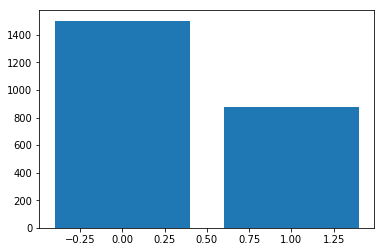

In [9]:
plt.bar((0, 1), res_adj)

In [5]:
research = TextBlob(open('research.txt').read())

In [6]:
resa_adj = count_adj_adv(research)

<BarContainer object of 2 artists>

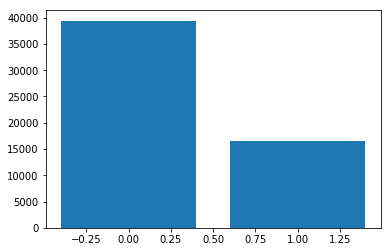

In [10]:
plt.bar((0, 1), resa_adj)

In [11]:
sum(res_adj) / len(responses.words)

0.1329531477132953

In [12]:
sum(resa_adj) / len(research.words)

0.14446345132218205

In [6]:
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

I1115 14:41:27.048469 4717723072 file_utils.py:39] PyTorch version 1.3.1 available.
I1115 14:41:27.138525 4717723072 modeling_xlnet.py:194] Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


2019-11-15 14:41:28,805 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/models-v0.4/classy-imdb-en-rnn-cuda%3A0/imdb-v0.4.pt not found in cache, downloading to /var/folders/76/3ttbq1hj5rjcsx4y_bmznj400000gn/T/tmpmh0k9z71


100%|██████████| 1501979561/1501979561 [08:50<00:00, 2830515.15B/s]

2019-11-15 14:50:19,983 copying /var/folders/76/3ttbq1hj5rjcsx4y_bmznj400000gn/T/tmpmh0k9z71 to cache at /Users/edwardli/.flair/models/imdb-v0.4.pt


2019-11-15 14:50:22,069 removing temp file /var/folders/76/3ttbq1hj5rjcsx4y_bmznj400000gn/T/tmpmh0k9z71
2019-11-15 14:50:22,333 loading file /Users/edwardli/.flair/models/imdb-v0.4.pt


In [7]:
s = flair.data.Sentence(open('responses.txt').read())

In [ ]:
flair_sentiment.predict(s)

In [9]:
response_sent = s.labels

In [10]:
response_sent

[NEGATIVE (0.9818025231361389)]

In [11]:
s2 = flair.data.Sentence(open('research.txt').read());

In [12]:
flair_sentiment.predict(s2);

KeyboardInterrupt: 

In [13]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [14]:
res = TextBlob(open('responses.txt').read())

In [20]:
t = nlp(str(res.sentences[0]))

In [27]:
t

Dear Dad,
I'm so sorry to hear that Mr. and Mrs. Friedson's son, Brian, has been diagnosed with Duchenne Muscular Dystrophy.

In [28]:
[(i,i.dep_) for i in t]

[(Dear, 'amod'),
 (Dad, 'npadvmod'),
 (,, 'punct'),
 (, ''),
 (I, 'nsubj'),
 ('m, 'ROOT'),
 (so, 'advmod'),
 (sorry, 'acomp'),
 (to, 'aux'),
 (hear, 'xcomp'),
 (that, 'mark'),
 (Mr., 'poss'),
 (and, 'cc'),
 (Mrs., 'compound'),
 (Friedson, 'conj'),
 ('s, 'case'),
 (son, 'nsubjpass'),
 (,, 'punct'),
 (Brian, 'appos'),
 (,, 'punct'),
 (has, 'aux'),
 (been, 'auxpass'),
 (diagnosed, 'ccomp'),
 (with, 'prep'),
 (Duchenne, 'compound'),
 (Muscular, 'compound'),
 (Dystrophy, 'pobj'),
 (., 'punct')]

In [32]:
from tqdm import tqdm

In [44]:
act_cnt = 0
pass_cnt = 0

PASSIVE = ['nsubjpass', 'auxpass', 'csubjpass']
ACTIVE = ['nsubj', 'aux', 'csubj']

for sentence in tqdm(res.sentences):
    t = nlp(str(sentence))
    for tok in t:
        if tok.dep_ in PASSIVE:
            pass_cnt += 1
        elif tok.dep_ in ACTIVE:
            act_cnt += 1

100%|██████████| 777/777 [00:06<00:00, 115.43it/s]


In [45]:
(act_cnt, pass_cnt)

(2500, 311)

In [62]:
act_perc = act_cnt / (act_cnt + pass_cnt)

In [34]:
research = TextBlob(open('research.txt').read())

In [47]:
act_cnt_2 = 0
pass_cnt_2 = 0

PASSIVE = ['nsubjpass', 'auxpass', 'csubjpass']
ACTIVE = ['nsubj', 'aux', 'csubj']

for sentence in tqdm(research.sentences):
    t = nlp(str(sentence))
    for tok in t:
        if tok.dep_ in PASSIVE:
            pass_cnt_2 += 1
        elif tok.dep_ in ACTIVE:
            act_cnt_2 += 1

100%|██████████| 16284/16284 [02:20<00:00, 115.57it/s]


In [48]:
(act_cnt_2 , pass_cnt_2)

(37233, 13477)

In [61]:
act_perc_2 = act_cnt_2 / (act_cnt_2 + pass_cnt_2)

In [51]:
act_sent = 0
pass_sent = 0

PASSIVE = ['nsubjpass', 'auxpass', 'csubjpass']
ACTIVE = ['nsubj', 'aux', 'csubj']

for sentence in tqdm(res.sentences):
    t = nlp(str(sentence))
    a = 0
    p = 0
    for tok in t:
        if tok.dep_ in PASSIVE:
            p += 1
        elif tok.dep_ in ACTIVE:
            a += 1
    if p > a:
        pass_sent += 1
    elif a > p:
        act_sent += 1

100%|██████████| 777/777 [00:06<00:00, 117.30it/s]


In [52]:
(act_sent, pass_sent)

(686, 51)

In [57]:
act_sent_perc = act_sent / (act_sent + pass_sent)

In [54]:
act_sent_2 = 0
pass_sent_2 = 0

PASSIVE = ['nsubjpass', 'auxpass', 'csubjpass']
ACTIVE = ['nsubj', 'aux', 'csubj']

for sentence in tqdm(research.sentences):
    t = nlp(str(sentence))
    a = 0
    p = 0
    for tok in t:
        if tok.dep_ in PASSIVE:
            p += 1
        elif tok.dep_ in ACTIVE:
            a += 1
    if p > a:
        pass_sent_2 += 1
    elif a > p:
        act_sent_2 += 1

100%|██████████| 16284/16284 [02:23<00:00, 113.45it/s]


In [55]:
(act_sent_2, pass_sent_2)

(11396, 3157)

In [58]:
act_sent_perc_2 = act_sent_2 / (act_sent_2 + pass_sent_2)

In [59]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

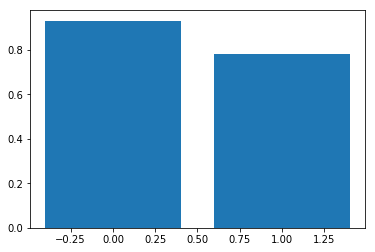

In [60]:
plt.bar((0,1), (act_sent_perc, act_sent_perc_2))

<BarContainer object of 2 artists>

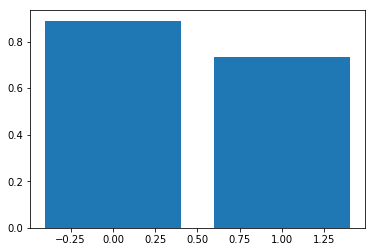

In [63]:
plt.bar((0,1), (act_perc, act_perc_2))